# Aaron Mosher

Jupyter notebook implementation of Conway's Game of Life (Cellular Automaton).
this is a Python notebook using Python 3.8.8

Yes I know that other implementations of this already exist. Example ["lifepy"](https://pythonawesome.com/run-conways-game-of-life-simulations-with-python-that-can-be-printed-into-terminal).


In [109]:
import sys
print(sys.version)

# on my computer this prints:
# 3.8.8 (default, Apr 13 2021, 19:58:26) 
# [GCC 7.3.0]
# (I am using Visual Studio Code Jupyter notebook to write this, with Conda base environment Python 3.8.8)

3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]


In [110]:
# import some prerequisites to help us. Numpy for math arrays, and PIL helps us save images as output.
import numpy as np
from PIL import Image

In [111]:
print ("test output")

test output


In [117]:
# for this simple example, just using a 256x256 array.
# For this case, we only care about integers of [0,1] (False vs True values for the cells)
# note that randint specifies the interval as "one above teh largest signed integer" so range of [0,2) gives us values of either 0 or 1 in the Output.

# You can use random just to see what happens.
# StartArray = np.random.randint(low=0, high = 2, size=(256,256))

# this is a test sequence of oscillators for testing purposes
TestArray = np.array(  [[0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,1,1,1,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,1,1,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,1,1,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,1,1,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,1,1,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,1,1,1,0,0,0], \
                        [0,0,0,0,0,0,0,1,1,1,0,0,0,0], \
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0] ])

#print (TestArray)
#StartArray = np.zeros(shape=(256,256),dtype=np.int8)
#StartArray[3:16,3:13] += TestArray
StartArray = TestArray
print(StartArray)
print(StartArray.shape)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
(18, 14)


(18, 14)


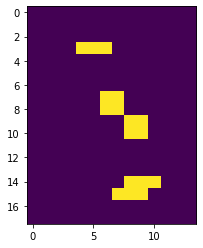

In [118]:
#verify shape and data.
print(StartArray.shape)

%matplotlib inline 
from matplotlib import pyplot
pyplot.imshow(StartArray, interpolation='none')
pyplot.show()


Now that all that setup is done, we can get to the rules of the Game of Life.
 There's a few different ways to slice this, but just for simplicity I'll do a naive nested-for loop.
 I know this is _extremely_ slow and wastefull because it blocks on the Python interpreter for _every_ operation, 
 but just for the purpose of illustration.

 A better implementation would be to use something like numpy.vectorize Or lambda functions for the NDarray.
 but hey if you really cared about __runtime speed__ you wouldn't be here (inside an Jupyter notebook), you'd be in C++ with CUDA.

In [119]:

#
# The "Tick" function takes in the previous game state and caculates and returns the Next game state.
# In this case, the "Tick_NestedFor" function is a naive nested-for-loop implementation.
def Tick_NestedLoops (ndarray_in: np.ndarray) -> np.ndarray:
    #print("\tDebug: start...")
    #
    # I know that this nested-Loop implementation is a strange pattern to use for Python, but there is a reason I do this because its 
    #    analagous to the C++ implementation I'll make later.
    # It doesn't seem to make much difference in Python but for C++ and CUDA you need to know if your data is stored in row-major or Column major 
    #    format for faster memory access patterns on your inner-most loop (similar issue happens in NCHW vs NHWC tensor array for different architectures).
    #    NDarrays are [row,col].
    #
    # column iterator "i"
    j = 1; # note that these start at 1, not Zero, to avoid the boundary / edge conditions.
    NumCols_j = ndarray_in.shape[1] -1

    # row iterator "j"
    i = 1;
    NumRows_i = ndarray_in.shape[0] -1

    # print("Size input array: ", NumRows_i, NumCols_j)

    # setup output array
    ndarray_out = np.zeros_like(ndarray_in)

    while (i < NumRows_i):
        j = 1 # restart the column counter for each new row.
        while (j < NumCols_j):
            #print("debug ",i,j)

            int_LiveNeighborsCount = 0
            # could be implemented as another loop using 3x3 convolution kernel, but here is unrolled into a sequence of 8 statements (each cell has 8 possible neighbors)
            if (ndarray_in[i+1,j+1] > 0):
                int_LiveNeighborsCount += 1
            if (ndarray_in[i+1,j] > 0):
                int_LiveNeighborsCount += 1
            if (ndarray_in[i+1,j-1] > 0):
                int_LiveNeighborsCount += 1

            if (ndarray_in[i,j+1] > 0):
                int_LiveNeighborsCount += 1
            if (ndarray_in[i,j-1] > 0):
                int_LiveNeighborsCount += 1

            if (ndarray_in[i-1,j+1] > 0):
                int_LiveNeighborsCount += 1
            if (ndarray_in[i-1,j] > 0):
                int_LiveNeighborsCount += 1
            if (ndarray_in[i-1,j-1] > 0):
                int_LiveNeighborsCount += 1

            # now apply rules based on number of live neighbors: Note that the output array starts as Zero's initially.
            if (ndarray_in[i,j] > 0): # if cell was already alive
                if (int_LiveNeighborsCount == 2) or (int_LiveNeighborsCount == 3):
                    ndarray_out[i,j] = 1
            elif (int_LiveNeighborsCount == 3):
                    ndarray_out[i,j] = 1
            j += 1
        # end "while i" columns loop

        i += 1
    # end "while j" rows loop
    # print("\tDebug: done.")
    return ndarray_out
# end function "def Tick (nparray_in: np.ndarray) -> np.ndarray:"

In [120]:
# this of course runs very slow because its not vectorized...
ndarray_result = Tick_NestedLoops(StartArray)

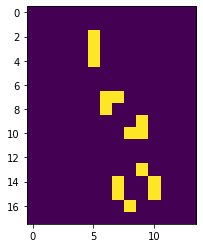

In [121]:

pyplot.imshow(ndarray_result, interpolation='nearest')
pyplot.show()
# ndarray_result = Tick_NestedLoops(StartArray)

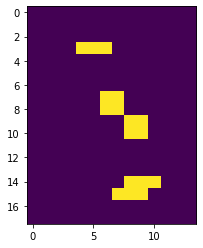

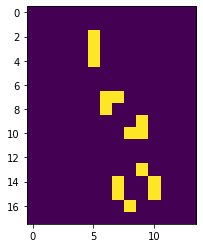

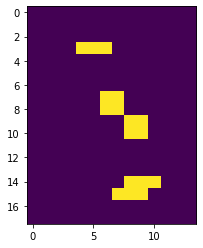

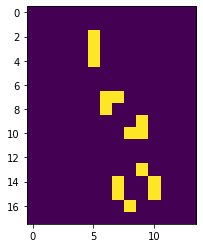

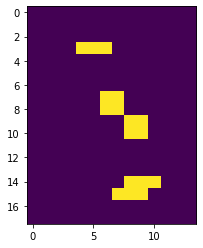

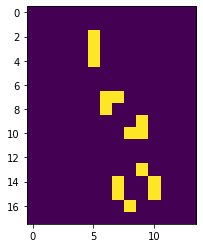

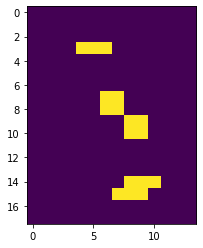

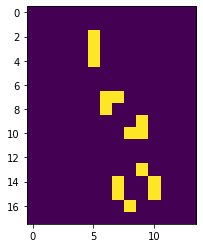

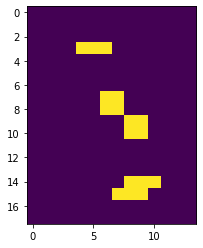

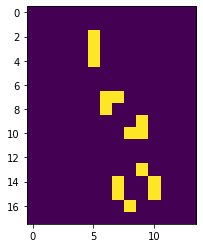

In [122]:
TickCounter = 0

while (TickCounter < 10):
    StartArray = np.copy(ndarray_result)
    ndarray_result = Tick_NestedLoops(StartArray)
    # ndarray_result *= 255  # scale for mathplotlib output, # this is not actually necessary, MatPlotLib handles it fine. 
    # print (ndarray_result)
    %matplotlib inline 
    from matplotlib import pyplot
    pyplot.imshow(ndarray_result, interpolation='nearest')
    pyplot.show()
    TickCounter += 1